In [ ]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.7 MB/s eta 0:00:00


# .nc to .csv
This notebook is to convert predictor grid points into a .csv format for interpolating datasets to predictor grid resolutions.


Represent all combinations of (lat,lon) on a meshgrid, then flatten to represent grid in a column format.

In [ ]:
import netCDF4 as nc
import numpy as np
import csv
import matplotlib.pyplot as plt

# Open the NetCDF file
dataset = nc.Dataset('/content/CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc')

# Extract variables
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
data_variable = dataset.variables['z'][:]

# Create a grid of coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Flatten the grids and data variable
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()
data_flat = data_variable.flatten()

# Combine into XYZ format
xyz_data = np.column_stack((lon_flat, lat_flat, data_flat))


In [ ]:
# Write to a CSV file
with open('prectictor_grid_points.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Longitude', 'Latitude', 'Data'])  # Write header
    writer.writerows(xyz_data)


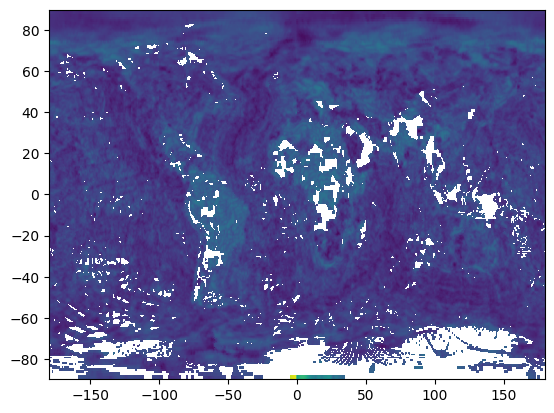

In [ ]:
plt.pcolor(lon_grid, lat_grid, data_variable)
plt.show()

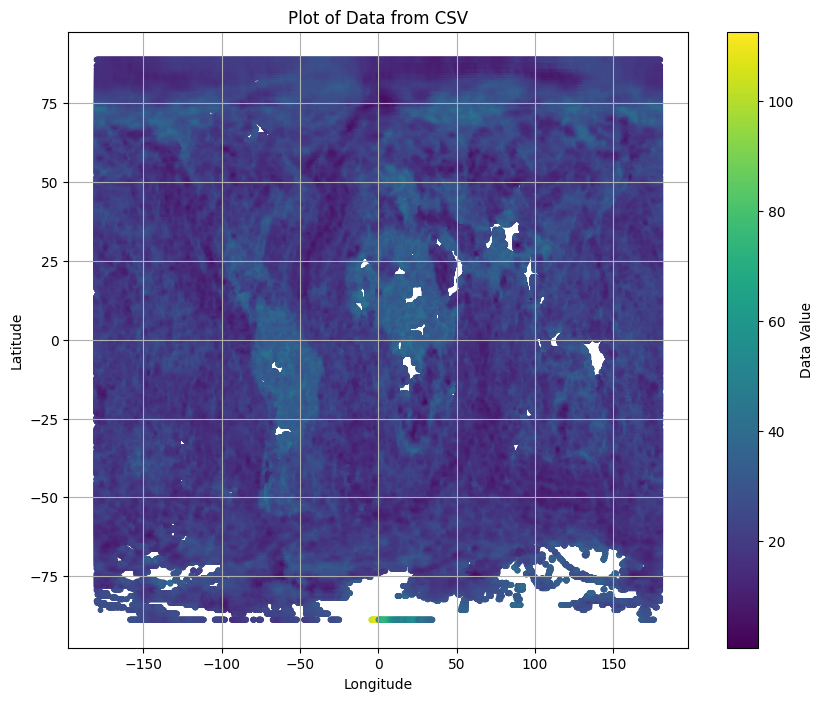

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV Data
df = pd.read_csv('/content/prectictor_grid_points.csv')

# Step 2: Prepare Data
longitude = df['Longitude']
latitude = df['Latitude']
data = df['Data']

# Step 3: Plotting
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=data, cmap='viridis', marker='o', s=10)
plt.colorbar(label='Data Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of Data from CSV')
plt.grid(True)
plt.show()
